<a href="https://colab.research.google.com/github/antontregub/labs/blob/main/Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('titanic.csv')
#df = df.drop('fnlwgt',axis=1)
df = df.replace('?', np.NaN)

In [38]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

Task 2

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df = df.dropna()

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['workcPassengerIdlass'] = pd.Categorical(df['PassengerId'])
df['Survived'] = pd.Categorical(df['Survived'])
df['Pclass'] = pd.Categorical(df['Pclass'])
df['Name'] = pd.Categorical(df['Name'])
df['Sex'] = pd.Categorical(df['Sex'])
df['Age'] = pd.Categorical(df['Age'])
df['SibSp'] = pd.Categorical(df['SibSp'])
df['Parch'] = pd.Categorical(df['Parch'])
df['Ticket'] = pd.Categorical(df['Ticket'])
df['Fare'] = pd.Categorical(df['Fare'])
df['Cabin'] = pd.Categorical(df['Cabin'])
df['Embarked'] = pd.Categorical(df['Embarked'])

Task 3

In [8]:
df_for_viz = df.copy()
for column in df_for_viz.select_dtypes(include='category').columns:
    df_for_viz[column] = df_for_viz[column].cat.codes

All-vs-All correlation

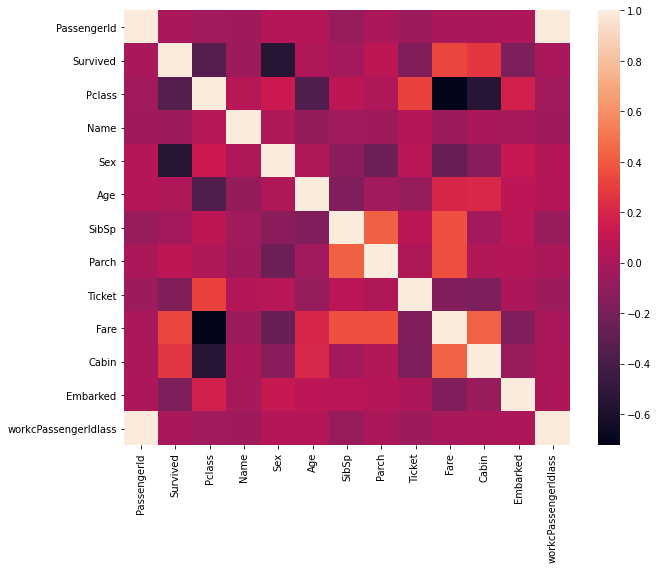

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df_for_viz.corr())



```
# Distribution plots
```



TypeError: ignored

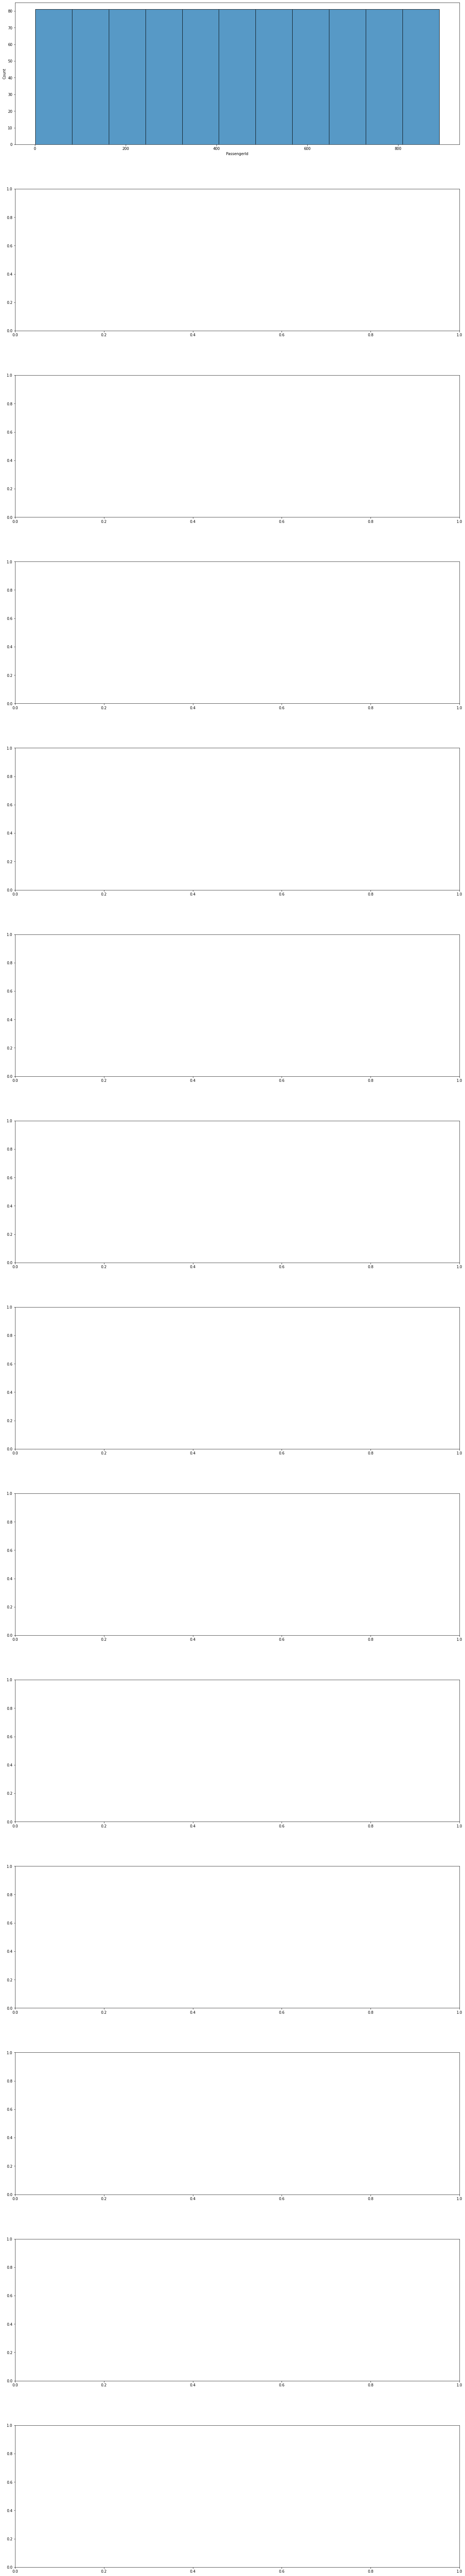

In [10]:
fig, axes = plt.subplots(nrows=14, ncols=1,figsize=(20,100))
fig.tight_layout(pad=10.0)
ax_iter = iter(axes.flat)
for column in df.columns:
    ax = next(ax_iter)
    if column in ('occupation', 'native-country'):
        ax.tick_params(labelrotation=90)
    a = sns.histplot(df[column],ax=ax)

Boxplots conditioned on label

ValueError: ignored

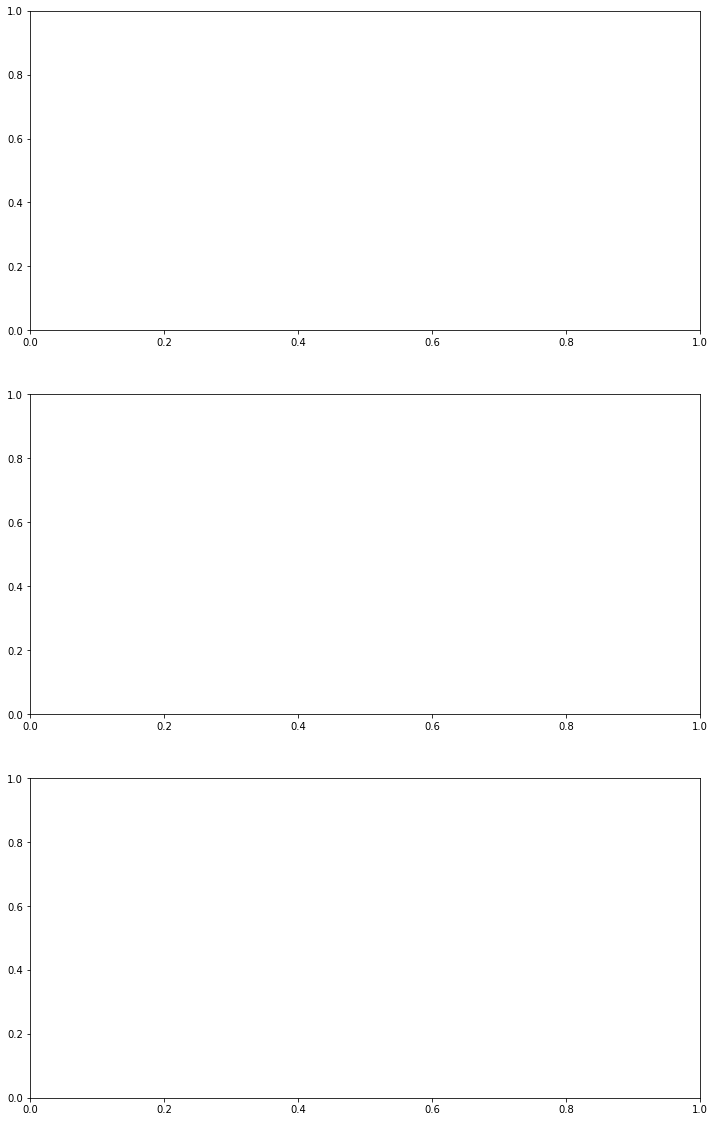

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12,20))
ax_iter = iter(axes.flat)
for column in ['Age', 'Pclass', 'Fare']:
    ax = next(ax_iter)
    a = sns.boxplot(x='Embarked', y=column, data=df,ax=ax)

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

One-Hot encoding

In [18]:
for column in df.select_dtypes(include='category').columns:
    if column=='Embarked':
        continue
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column)],axis=1)
    df.drop([column],axis=1, inplace=True)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Embarked',axis=1), df['Embarked'].cat.codes, test_size=0.2, random_state=42)

Numerical features scaling

In [20]:
for column in df.select_dtypes(include='int64').columns:
    scale = StandardScaler().fit(X_train[[column]])
    X_train[[column]] = scale.transform(X_train[[column]])
    X_test[[column]] = scale.transform(X_test[[column]])

KNN

In [21]:
n_neighbors = list(range(10,15))
hyperparameters = dict(n_neighbors=n_neighbors)
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, hyperparameters, cv=3, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   10.6s finished


Best n_neighbors: 13


In [22]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [23]:
knn.score(X_test, y_test)

0.770949720670391

In [24]:
f1_score(y_test, y_pred, average='weighted')

0.7362117844604756

Decision Tree

In [25]:
max_depth = [None,5,10,15]
hyperparameters = dict(max_depth=max_depth)
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, hyperparameters, cv=3, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1968s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.8s finished


Best max_depth: None


In [26]:
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print('Score:', dtc.score(X_test, y_test))
print(f1_score(y_test, y_pred, average='weighted'))

Score: 0.7597765363128491
0.7088125526582906


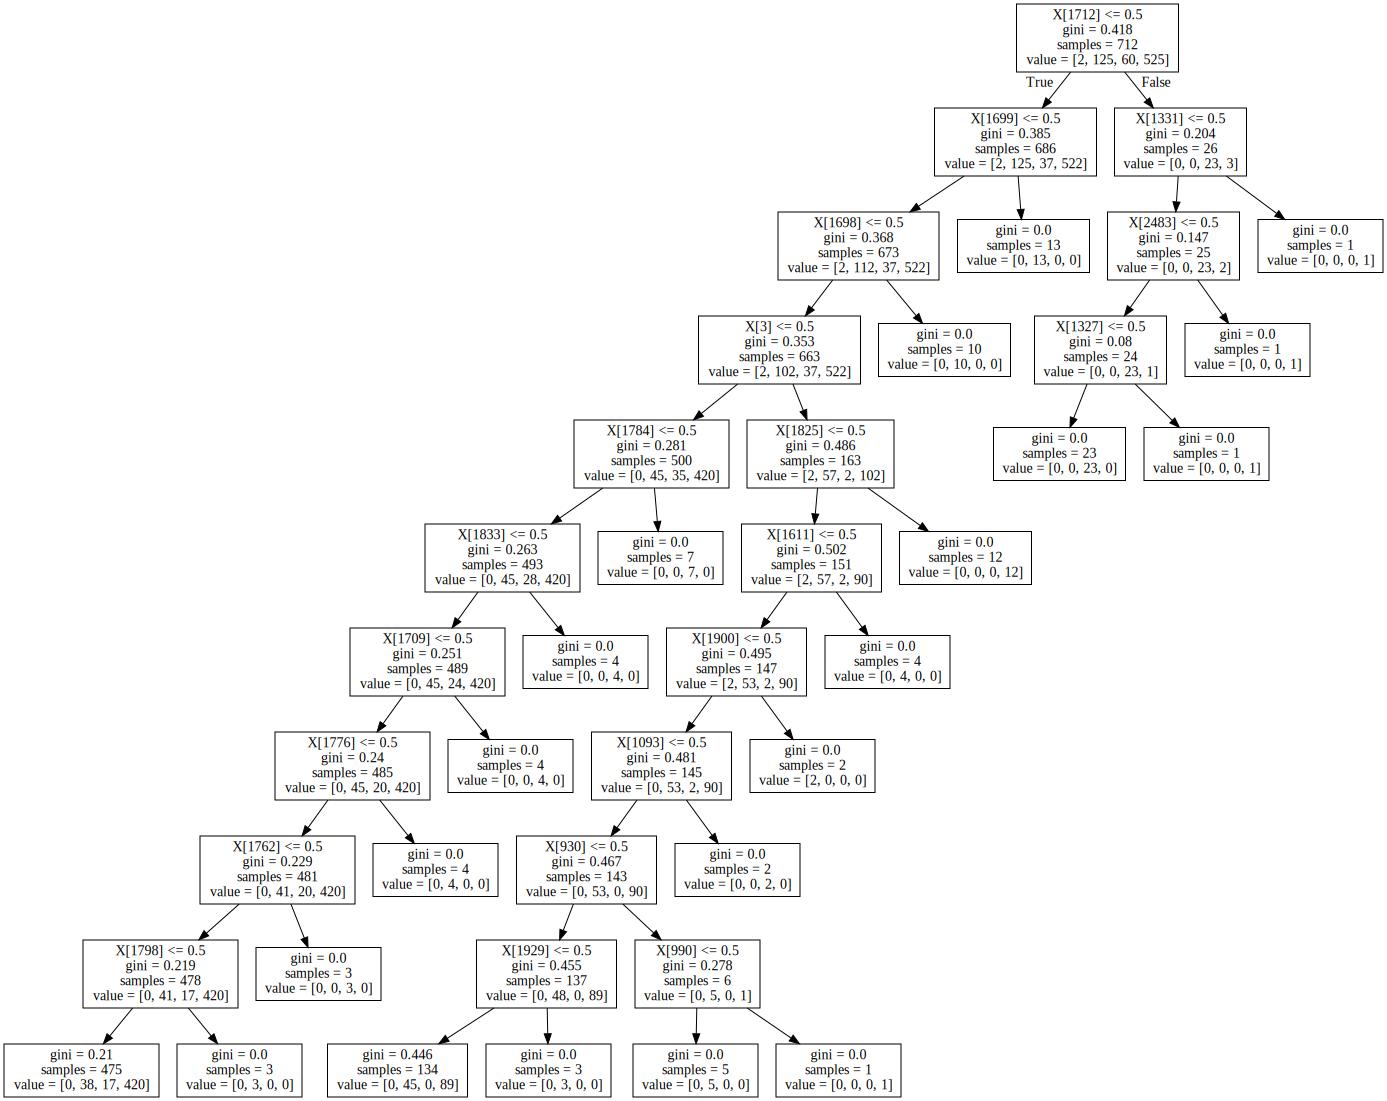

In [53]:
import graphviz
dot_data = export_graphviz(dtc, out_file=None, 
                                filled=False)
graph = graphviz.Source(dot_data, format="png") 
graph

In [54]:
X_train.columns

Index(['PassengerId', 'Survived_0', 'Survived_1', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Name_Abbing, Mr. Anthony',
       'Name_Abbott, Mr. Rossmore Edward',
       'Name_Abbott, Mrs. Stanton (Rosa Hunt)', 'Name_Abelson, Mr. Samuel',
       ...
       'workcPassengerIdlass_882', 'workcPassengerIdlass_883',
       'workcPassengerIdlass_884', 'workcPassengerIdlass_885',
       'workcPassengerIdlass_886', 'workcPassengerIdlass_887',
       'workcPassengerIdlass_888', 'workcPassengerIdlass_889',
       'workcPassengerIdlass_890', 'workcPassengerIdlass_891'],
      dtype='object', length=2968)

SVM

In [55]:
c = [0.1, 1, 2]
gamma = [0.1, 0.5]
kernel = ['rbf']
hyperparameters = dict(C=c, gamma=gamma, kernel=kernel)
svc = SVC()
clf = GridSearchCV(svc, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])
print('Best kernel:', best_model.best_estimator_.get_params()['kernel'])

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   15.0s finished


Best C: 2
Best gamma: 0.1
Best kernel: rbf


In [56]:
svc = SVC(C=2, kernel='rbf', gamma=0.1)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [57]:
svc.score(X_test, y_test)

0.7877094972067039

In [58]:
f1_score(y_test, y_pred, average='weighted')

0.7553031739488648

Random Forest

In [59]:
n_estimators = [5, 10, 100, 200, 500]
max_depth = [None, 5, 10,15,20,25]
min_samples_split = [0.1,0.25,0.5,1,2]
hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])

Fitting 2 folds for each of 150 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1635s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0672s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  63 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done  87 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:   34.1s
[Parallel(n_jo

Best n_estimators: 10
Best max_depth: None
Best min_samples_split: 0.25


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished


In [60]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=2)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.664804469273743

In [61]:
f1_score(y_test, y_pred, average='weighted')

0.5309512204266806

 AdaBoost

In [62]:
n_estimators = [10, 50, 100, 500]
learning_rate = [0.1, 0.5, 1, 2, 5, 10]
algorithm = ['SAMME', 'SAMME.R']
hyperparameters = dict(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm)
abc = AdaBoostClassifier()
clf = GridSearchCV(abc, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])
print('Best algorithm:', best_model.best_estimator_.get_params()['algorithm'])

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  2.6min finished


Best n_estimators: 100
Best learning_rate: 2
Best algorithm: SAMME.R


In [63]:
abc = AdaBoostClassifier(n_estimators=500, learning_rate=1, algorithm='SAMME.R')
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)
abc.score(X_test, y_test)

0.6983240223463687

In [65]:
f1_score(y_test, y_pred, average='weighted')

0.5941976497784627

Gradient Boost

In [66]:
learning_rate = [0.01, 0.1, 0.5]
n_estimators = [100, 250, 500]
max_depth = [3, 5, 7]
hyperparameters = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
gbc = GradientBoostingClassifier()
clf = GridSearchCV(gbc, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  7.8min finished


Best learning_rate: 0.5
Best n_estimators: 250
Best max_depth: 5


In [67]:
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3)
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
gbc.score(X_test, y_test)

0.8100558659217877

In [71]:
f1_score(y_test, y_pred, average='weighted')

0.7813195202522886

Best model by f1-score - GradientBoostingClassifier¶

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.35      0.52        43
           1       0.92      0.71      0.80        17
           2       0.78      0.99      0.87       119

    accuracy                           0.81       179
   macro avg       0.90      0.68      0.73       179
weighted avg       0.85      0.81      0.78       179



In [74]:
print(confusion_matrix(y_test, y_pred))

[[ 15   0  28]
 [  0  12   5]
 [  0   1 118]]
